In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Customer Segment analysis**

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

**1.Download the data set**

**2.Load the dataset**

In [3]:
dataframe=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3.Perform Below Virtualisation**

**Univariate analysis**

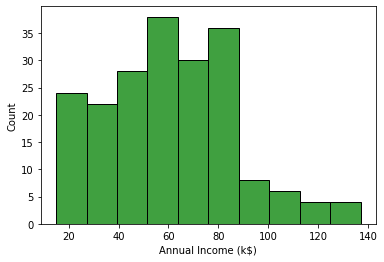

In [5]:
sb.histplot(dataframe['Annual Income (k$)'], color="green")

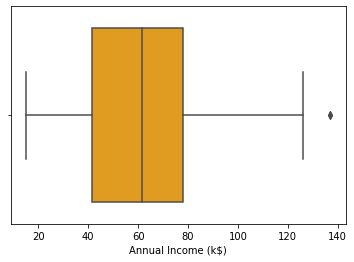

In [6]:
sb.boxplot(dataframe['Annual Income (k$)'], color="orange")

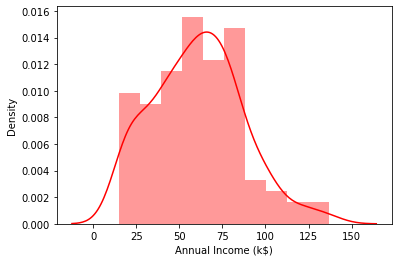

In [7]:
sb.distplot(dataframe['Annual Income (k$)'], color="red")

**Bivariate analysis**

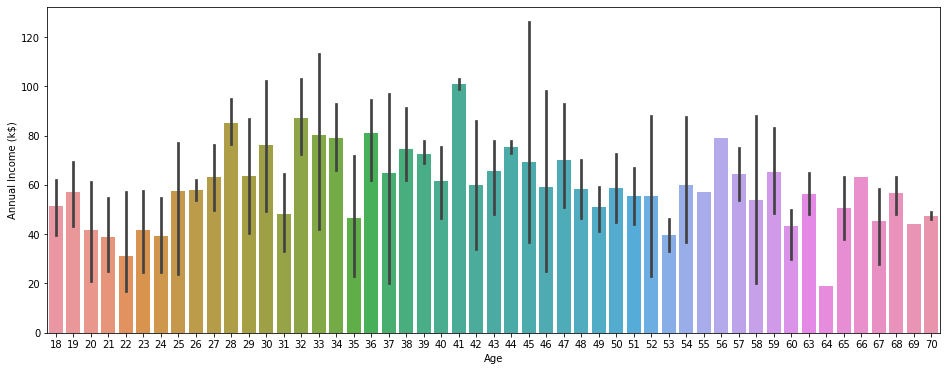

In [9]:
plt.figure(figsize=(16,6))
sb.barplot(dataframe['Age'],dataframe['Annual Income (k$)'])

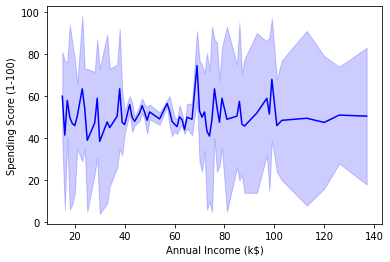

In [10]:
sb.lineplot(dataframe['Annual Income (k$)'], dataframe['Spending Score (1-100)'], color="blue")

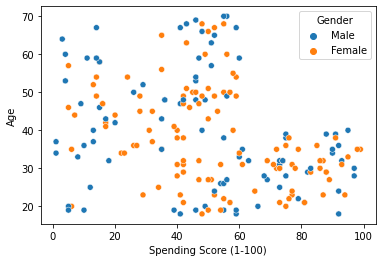

In [12]:
sb.scatterplot(dataframe['Spending Score (1-100)'], dataframe['Age'], hue = dataframe['Gender'])

Gender VS Age

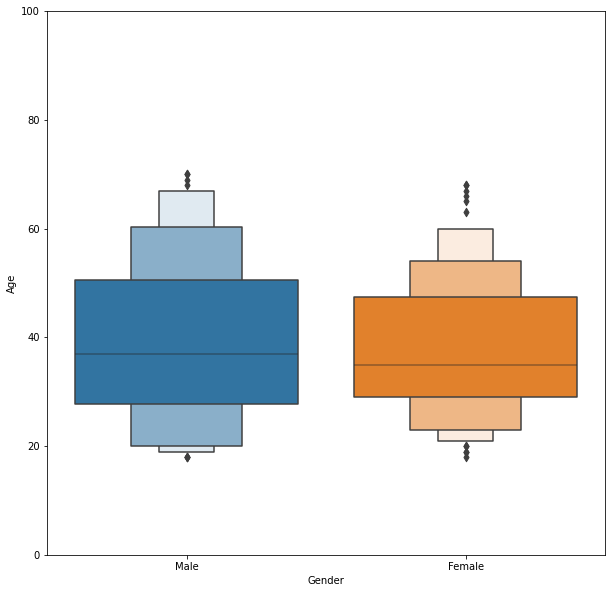

In [15]:
temp = pd.concat([dataframe['Age'], dataframe['Gender']], axis=1)
f, ax = plt.subplots(figsize=(10,10))
fig = sb.boxenplot(x='Gender', y="Age", data=dataframe)
fig.axis(ymin=0, ymax=100);

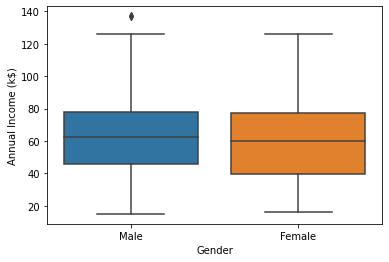

In [16]:
sb.boxplot(x=dataframe['Gender'],y=dataframe['Annual Income (k$)'])

**Multivariate Analysis**

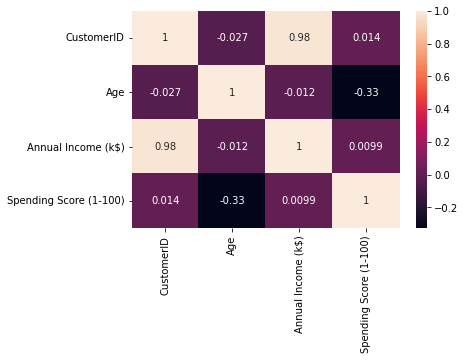

In [18]:
sb.heatmap(dataframe.corr(),annot=True)

**4.Perform Descriptive Stats on the Dataset**

In [20]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
dataframe.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [24]:
dataframe.shape

(200, 5)

**5.Check the missing values and deal with them**

In [25]:
dataframe.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [26]:
dataframe.drop('CustomerID',axis=1,inplace=True)
dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**6.Find the outliers and replace them**

In [27]:
for i in dataframe:
    if dataframe[i].dtype=='int64':
        q1=dataframe[i].quantile(0.25)
        q3=dataframe[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        dataframe[i]=np.where(dataframe[i] >upper, upper, dataframe[i])
        dataframe[i]=np.where(dataframe[i] <lower, lower, dataframe[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc1d9f3a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc1d99fb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc1b063990>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc1da6c110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc1ae51ad0>],
 'means': []}

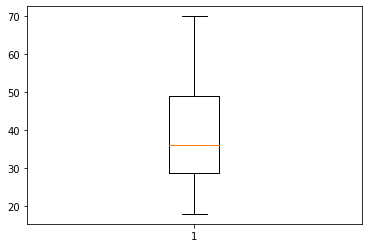

In [28]:
plt.boxplot(dataframe['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc1addc2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc1addcd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc1add4d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc1ade2850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc1ade2d90>],
 'means': []}

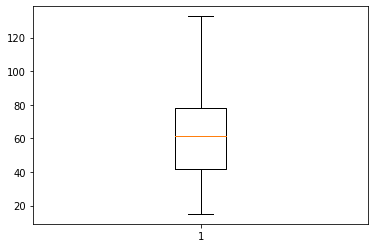

In [29]:
plt.boxplot(dataframe['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc1a5ca490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc1a5caf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc1a5c3e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc1a5d2a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc1a5d2f50>],
 'means': []}

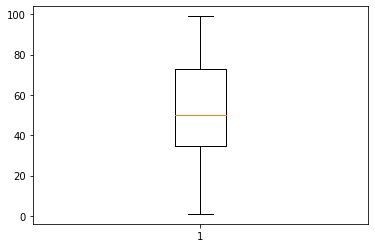

In [31]:
plt.boxplot(dataframe['Spending Score (1-100)'])

**7.Check the Categorial columns and perform encoding**

In [30]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [32]:
dataframe['Gender'] = l_en.fit_transform(dataframe['Gender'])
dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


**8.Scaling the data**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dataframe)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

**9.Perform any of the clustering algorithms**

In [35]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([2, 2, 1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 4, 1, 0, 2, 1, 2, 0, 1, 2, 2,
       4, 2, 4, 2, 4, 2, 4, 1, 0, 1, 0, 2, 4, 1, 4, 1, 4, 1, 4, 2, 0, 1,
       4, 1, 4, 1, 1, 1, 4, 2, 1, 0, 4, 0, 4, 0, 1, 0, 0, 2, 4, 4, 0, 2,
       4, 4, 2, 1, 0, 4, 4, 4, 0, 2, 4, 0, 1, 4, 0, 2, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 2, 0, 4, 1, 2, 4, 1, 0, 2, 1, 4, 0, 2, 0, 1, 4, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 4, 4, 4, 4, 2, 3, 6, 5, 3, 6, 0, 5, 0, 5, 7, 5,
       3, 6, 7, 6, 3, 5, 7, 6, 3, 5, 3, 6, 7, 5, 0, 6, 3, 5, 7, 5, 3, 6,
       3, 6, 7, 6, 7, 6, 4, 6, 7, 6, 0, 6, 7, 6, 3, 5, 7, 5, 7, 5, 3, 6,
       0, 5, 0, 5, 3, 6, 7, 6, 3, 5, 3, 5, 3, 6, 3, 6, 7, 6, 3, 6, 3, 5,
       7, 5], dtype=int32)

In [37]:
data1 = pd.DataFrame(data_scaled, columns = dataframe.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [38]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,2
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008493,0.051020,1
3,0.0,0.096154,0.008493,0.775510,1
4,0.0,0.250000,0.016985,0.397959,1


In [39]:
data1['kclus'].unique()

array([2, 1, 4, 0, 3, 6, 5, 7], dtype=int32)

In [40]:
data1['kclus'].value_counts()

4    37
1    34
0    33
2    23
6    22
3    19
5    18
7    14
Name: kclus, dtype: int64

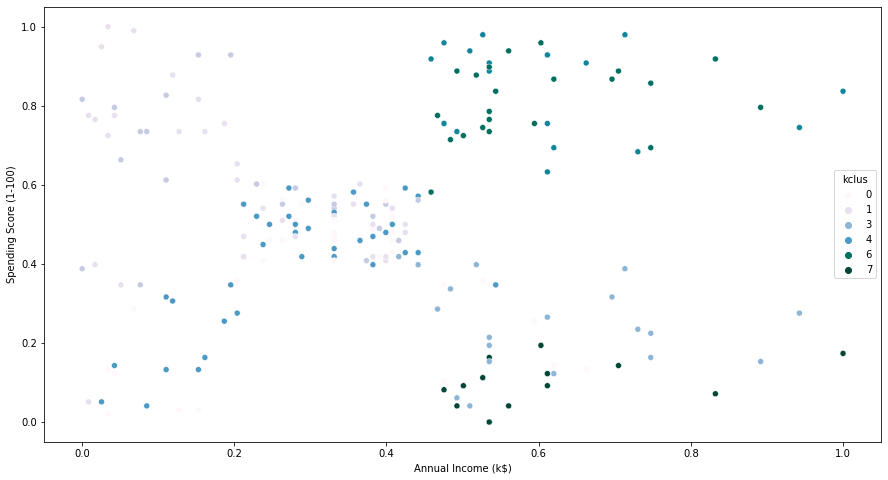

In [42]:
fig,ax = plt.subplots(figsize=(15,8))
sb.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [43]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [44]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,2
1,2
2,1
3,1
4,1


splitting into train and test data

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [46]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [47]:
y_train.head()

,kclus
116,4
67,4
78,1
42,0
17,2


In [48]:
y_test.head()

,kclus
58,1
40,4
34,4
102,0
184,3


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[3.02591096],
       [1.94358895],
       [1.86896907],
       [2.32988642],
       [5.14200145]])

Measure the perormance using metrices

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.0905041760194525
The Root mean squared error is:  1.7579829851336595
The Mean absolute error is:  1.5088782650551795
The accuracy is:  0.36698822066055803
